# Visualising Earnings Based On College Major

In this project, We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:



    Rank - Rank by median earnings (the dataset is ordered by this column).
    Major_code - Major code.
    Major - Major description.
    Major_category - Category of major.
    Total - Total number of people with major.
    Sample_size - Sample size (unweighted) of full-time.
    Men - Male graduates.
    Women - Female graduates.
    ShareWomen - Women as share of total.
    Employed - Number employed.
    Median - Median salary of full-time, year-round workers.
    Low_wage_jobs - Number in low-wage service jobs.
    Full_time - Number employed 35 hours or more.
    Part_time - Number employed less than 35 hours.


Using visualizations, we can start to explore the data from the dataset to answer questions like:

- Do students in more popular majors make more money?
     
- How many majors are predominantly male? Predominantly female?
    
- Which category of majors have the most students?
  



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
recent_grads = pd.read_csv('recent-grads.csv')
print(recent_grads.iloc[0]) # First row
print(recent_grads.head())  
print(recent_grads.tail())
recent_grads.describe() # descriptive statistics


Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [2]:
raw_data_count = len(recent_grads)
recent_grads = recent_grads.dropna(axis=0)
cleaned_data_count = len(recent_grads)
print('RAW  :  '+ str(raw_data_count))
print('CLEANED  :  '+ str(cleaned_data_count))

RAW  :  173
CLEANED  :  172


In [33]:
major_category = recent_grads['Major_category'].value_counts().sort_values(ascending =False)
print(major_category)
print(type(major_category))

Engineering                            29
Education                              16
Humanities & Liberal Arts              15
Biology & Life Science                 14
Business                               13
Health                                 12
Computers & Mathematics                11
Physical Sciences                      10
Social Science                          9
Psychology & Social Work                9
Agriculture & Natural Resources         9
Arts                                    8
Industrial Arts & Consumer Services     7
Law & Public Policy                     5
Communications & Journalism             4
Interdisciplinary                       1
Name: Major_category, dtype: int64
<class 'pandas.core.series.Series'>


- Engineering is the most popular major category (approx. 17%) while Interdisciplinary is the least popular (less than 1%).

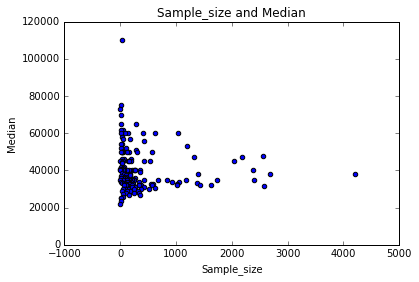

In [38]:
ax1 = recent_grads.plot(x='Sample_size', y='Median', kind='scatter', 
                  title='Sample_size and Median')


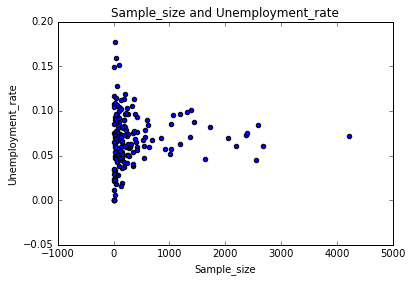

In [5]:
ax2 = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', 
                  title='Sample_size and Unemployment_rate')

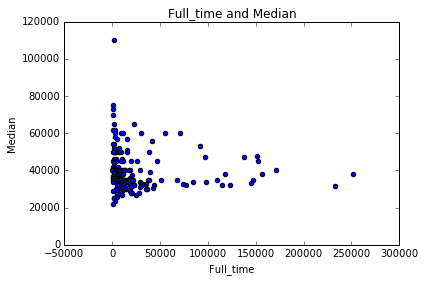

In [6]:
ax3 = recent_grads.plot(x='Full_time', y='Median', kind='scatter', 
                  title='Full_time and Median')

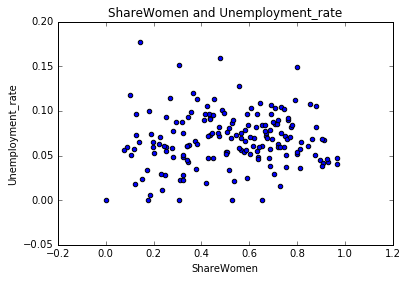

In [7]:
ax4 = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', 
                  title='ShareWomen and Unemployment_rate')

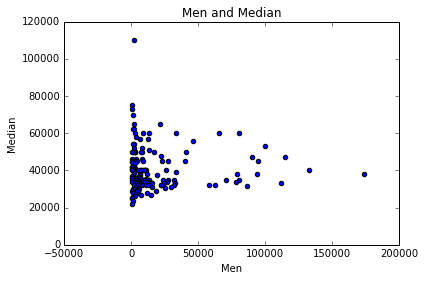

In [8]:
ax5 = recent_grads.plot(x='Men', y='Median', kind='scatter', 
                  title='Men and Median')

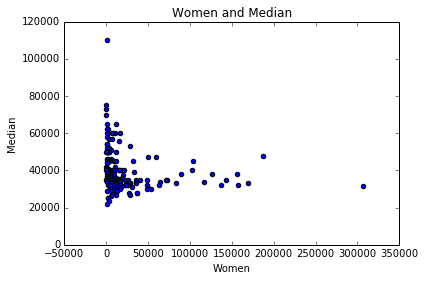

In [9]:
ax6 = recent_grads.plot(x='Women', y='Median', kind='scatter', 
                  title='Women and Median')

#### Findings
- There is no correlation between any of the variables in the scatter graphs. Majority of unemployment rate from is around 0.05 and 0.10 regardless of sample size. 
- The median salaries for both men and women are around 30,000 to 45,000 dollars. The graph for men and median salary is a bit more spread out above 50,000 men. This suggests that in majors with more than 50,000 men have slightly higher salary than majors with the same number of women.
- However, when we look at the last two graphs there is no indication of higher salaries for the more popular majors for both men and women.

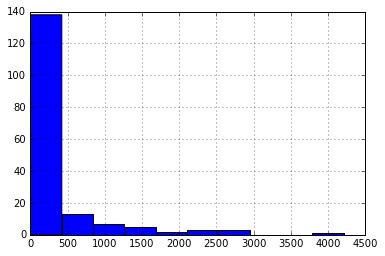

In [10]:
recent_grads['Sample_size'].hist()

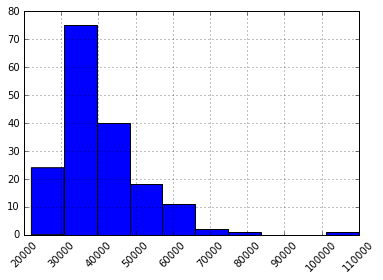

In [11]:
recent_grads['Median'].hist(xrot=45)

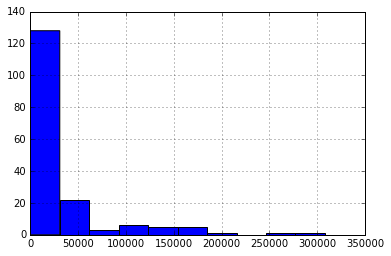

In [12]:
recent_grads['Employed'].hist()

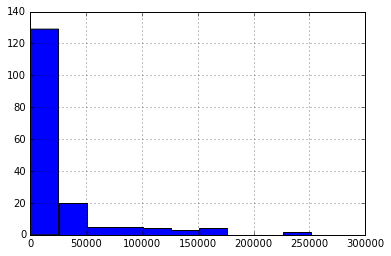

In [13]:
recent_grads['Full_time'].hist()

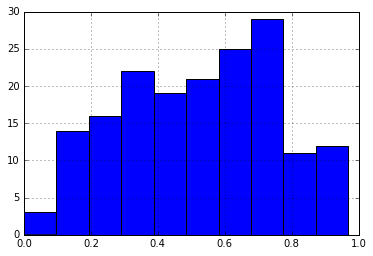

In [14]:
recent_grads['ShareWomen'].hist()

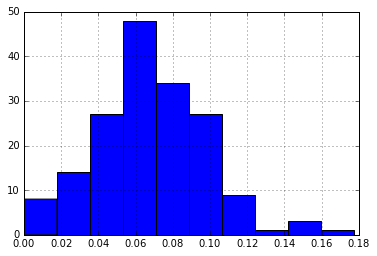

In [15]:
recent_grads['Unemployment_rate'].hist()

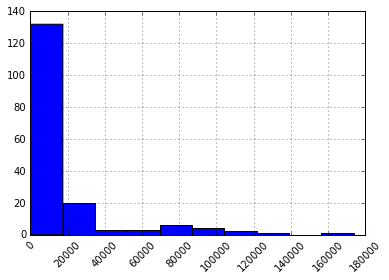

In [16]:
recent_grads['Men'].hist(xrot=45)

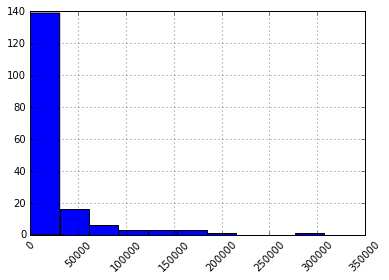

In [17]:
recent_grads['Women'].hist(xrot=45)

- About 20% of majors are predominantly male and 30% are predominantly for female. 
- The most common median salary range is 30,000 to 40,000 dollars.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb60d566e10>,
      dtype=object)

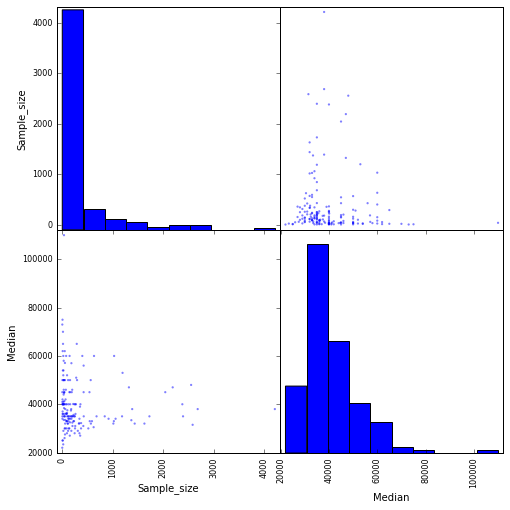

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size','Median']], figsize=(8,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb60d489d30>,
      dtype=object)

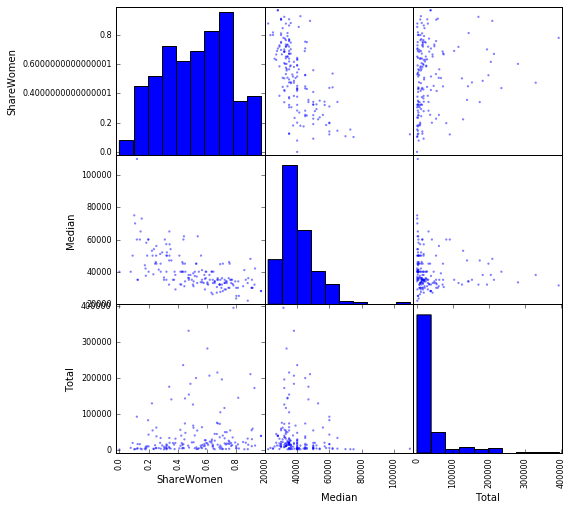

In [19]:
scatter_matrix(recent_grads[['ShareWomen','Median', 'Total']], figsize=(8,8))

- There is a slight negative correlation between the number of proportion of women in a major and median salary.

- No correlation between the popularity of major and median salary.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb60d0320b8>,
      dtype=object)

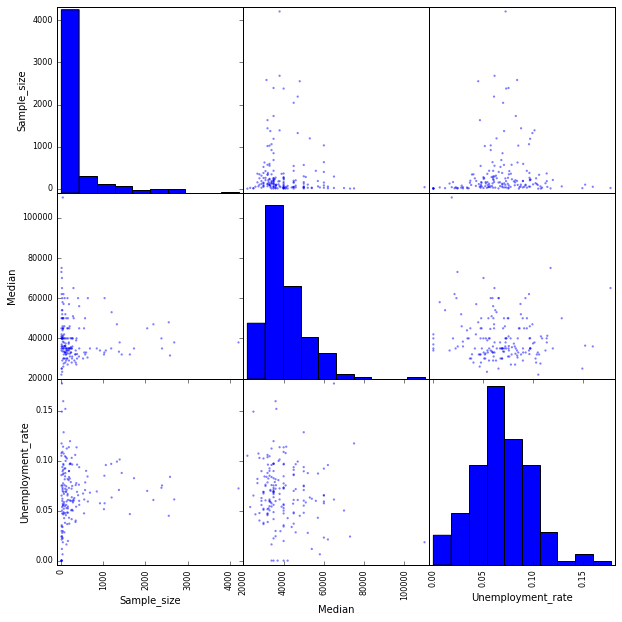

In [20]:
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']], figsize=(10,10))

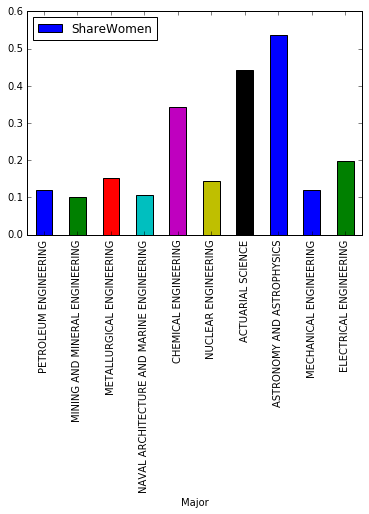

In [21]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen')

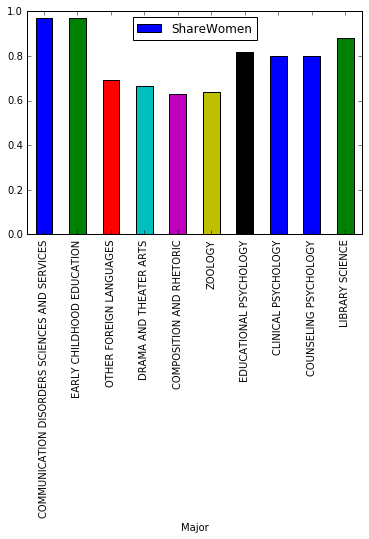

In [22]:
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen')

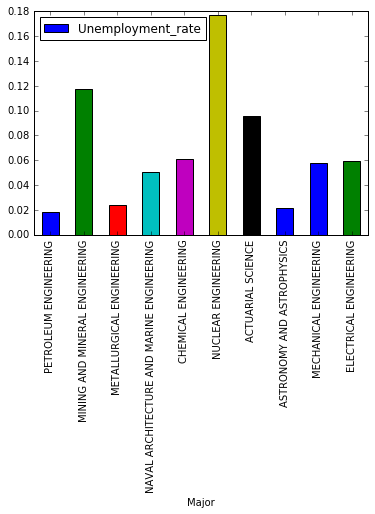

In [23]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate')

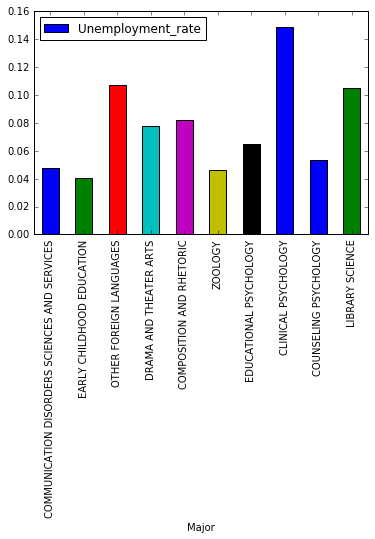

In [24]:
recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate')

- Clinical psychology has much higher unemployment rate than other psychology majors.

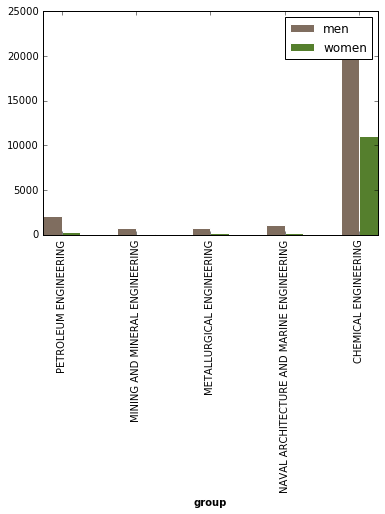

In [25]:
# compare the number of men with the number of women in majors highest median salary 

import numpy as np

 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = recent_grads['Men'][:5]
bars2 = recent_grads['Women'][:5]

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='men')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='women')

 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], recent_grads['Major'][:5], rotation=90)
 
# Create legend & Show graphic
plt.legend()
plt.show()

There are more men than women studied these top 5 STEM majors with highest median salary.

### Boxplots to explore the distributions

#### Median

In [ ]:
boxplot = recent_grads.boxplot(column=['Median'], vert=False)

#### Unemployment Rate

In [ ]:
boxplot = recent_grads.boxplot(column=['Unemployment_rate'], vert=False) 

- Majority of Recent Graduated Students are earning around 35,000 to 45,000 dollars as indicated the IQR.
- Some outliers above 65,000 dollars.
- The range of Umemployment rate for Recent Graduated Students is bettween 0 to 13 percent.
- The median Unemployment rate is 7 percent.
- The IQR which represent the majority of Unemployment are between 5 percent to 10 percent.
- Some outliers above 15 percent.


### Hexagonal bin plots to visualise the denseness 

#### Sample size vs Median

In [ ]:
recent_grads.plot.hexbin(x='Median', y='Sample_size', gridsize=20)

#### Sample size vs Unemployment rate

In [ ]:
recent_grads.plot.hexbin(x='Sample_size', y='Unemployment_rate', gridsize=20)

- Most recent graduated students are paying around 35000 a year.
- The Unemployment rates are around 5 percents to 10 percents


### Conclusion

There is no indication of higher salaries for the more popular majors for both men and women.  There are about 20% of majors are predominantly male and 30% are predominantly for female. Engineering is the most popular major category (approx. 17%) and majors in Education, Humanities & Liberal Arts and Biology & Life Science are also popular. The least popular majors are in Law & Public Policy, Communications & Journalism and Interdisciplinary.  
   
